In [ ]:
import sqlite3

# Create a new SQLite database (in-memory for now)
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()


In [ ]:
# List of all tables to drop
tables = [
    "SITE",
    "HOTEL",
    "ROOM",
    "CUSTOMER",
    "BOOKING",
    "REVIEW",
    "EMPLOYEE",
    "CONTRACT",
    "PAYMENT",
    "HOTEL_FACILITY",
    "HOTEL_FACILITY_ASSIGNMENT"
]

# Execute DROP TABLE for each table
for table in tables:
    cursor.execute(f"DROP TABLE IF EXISTS {table}")
    print(f"❌ Table {table} deleted")

# Commit changes
conn.commit()

print("✅ All tables deleted successfully!")


❌ Table SITE deleted
❌ Table HOTEL deleted
❌ Table ROOM deleted
❌ Table CUSTOMER deleted
❌ Table BOOKING deleted
❌ Table REVIEW deleted
❌ Table EMPLOYEE deleted
❌ Table CONTRACT deleted
❌ Table PAYMENT deleted
❌ Table HOTEL_FACILITY deleted
❌ Table HOTEL_FACILITY_ASSIGNMENT deleted
✅ All tables deleted successfully!


In [ ]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("hotel_db.sqlite")  # Connects to or creates 'hotel_db.sqlite'
cursor = conn.cursor()

# List of SQL table creation queries
create_queries = [
    """CREATE TABLE SITE (
        Site_id INTEGER PRIMARY KEY,
        Site_name TEXT NOT NULL,
        Location_postcode TEXT NOT NULL,
        Location_city TEXT NOT NULL
    );""",

    """CREATE TABLE HOTEL (
        Hotel_id INTEGER PRIMARY KEY,
        Site_id INTEGER NOT NULL,
        Floor INTEGER NOT NULL CHECK (Floor >= 0),
        FOREIGN KEY (Site_id) REFERENCES SITE(Site_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE ROOM (
        Room_id INTEGER PRIMARY KEY,
        Hotel_id INTEGER NOT NULL,
        Room_type TEXT NOT NULL,
        Room_rate REAL NOT NULL CHECK (Room_rate >= 0),
        FOREIGN KEY (Hotel_id) REFERENCES HOTEL(Hotel_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE CUSTOMER (
        Customer_id INTEGER PRIMARY KEY,
        First_name TEXT NOT NULL,
        Surname TEXT NOT NULL,
        Email TEXT UNIQUE NOT NULL,
        Membership TEXT CHECK (Membership IN ('None', 'Silver', 'Gold')),
        Phone_Number TEXT NOT NULL CHECK (length(Phone_Number) >= 10)
    );""",

    """CREATE TABLE BOOKING (
        Booking_id INTEGER PRIMARY KEY,
        Room_id INTEGER NOT NULL,
        Customer_id INTEGER NOT NULL,
        Booking_date DATE NOT NULL,
        Stay_purpose TEXT CHECK (Stay_purpose IN ('Business', 'Leisure')),
        Num_of_adult INTEGER NOT NULL CHECK (Num_of_adult >= 0),
        Check_in_date DATE NOT NULL,
        Check_out_date DATE NOT NULL,
        Check_in_time TIME NOT NULL,
        Check_out_time TIME NOT NULL,
        Num_of_car INTEGER CHECK (Num_of_car >= 0),
        Booking_type TEXT CHECK (Booking_type IN ('Online', 'Phone', 'Walk-in')),
        FOREIGN KEY (Room_id) REFERENCES ROOM(Room_id) ON DELETE CASCADE,
        FOREIGN KEY (Customer_id) REFERENCES CUSTOMER(Customer_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE REVIEW (
        Review_id INTEGER PRIMARY KEY,
        Booking_id INTEGER NOT NULL,
        Satisfaction_score INTEGER NOT NULL,
        FOREIGN KEY (Booking_id) REFERENCES BOOKING(Booking_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE EMPLOYEE (
        Employee_id INTEGER PRIMARY KEY,
        Hotel_id INTEGER NOT NULL,
        First_name TEXT NOT NULL,
        Surname TEXT NOT NULL,
        Gender TEXT,
        DOB DATE NOT NULL,
        FOREIGN KEY (Hotel_id) REFERENCES HOTEL(Hotel_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE CONTRACT (
        Contract_id INTEGER PRIMARY KEY,
        Employee_id INTEGER NOT NULL,
        Hire_date DATE NOT NULL,
        End_date DATE,
        Salary REAL NOT NULL CHECK (Salary > 0),
        Job_type TEXT NOT NULL,
        FOREIGN KEY (Employee_id) REFERENCES EMPLOYEE(Employee_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE PAYMENT (
        Payment_id INTEGER PRIMARY KEY,
        Booking_id INTEGER NOT NULL,
        Base_charge REAL NOT NULL CHECK (Base_charge >= 0),
        Total_Additional_Charges REAL DEFAULT 0 CHECK (Total_Additional_charges >= 0),
        Total_amount_due REAL NOT NULL CHECK (Total_amount_due >= 0),
        Payment_method TEXT,
        Payment_date DATE NOT NULL,
        FOREIGN KEY (Booking_id) REFERENCES BOOKING(Booking_id) ON DELETE CASCADE
    );""",

    """CREATE TABLE HOTEL_FACILITY (
        Hotelfacility_code INTEGER PRIMARY KEY,
        Facility_name TEXT NOT NULL
    );""",

    """CREATE TABLE HOTEL_FACILITY_ASSIGNMENT (
        Hotel_id INTEGER NOT NULL,
        Hotelfacility_code INTEGER NOT NULL,
        PRIMARY KEY (Hotel_id, Hotelfacility_code),
        FOREIGN KEY (Hotel_id) REFERENCES HOTEL(Hotel_id) ON DELETE CASCADE,
        FOREIGN KEY (Hotelfacility_code) REFERENCES HOTEL_FACILITY(Hotelfacility_code) ON DELETE CASCADE
    );"""
]

# Execute each query separately to avoid SQLite multi-statement execution errors
for query in create_queries:
    cursor.execute(query)

# Commit changes and close connection
conn.commit()
conn.close()

# Confirm table creation
print("All tables created successfully in SQLite database 'hotel_db.sqlite'!")


All tables created successfully in SQLite database 'hotel_db.sqlite'!


In [ ]:
import pandas as pd
import sqlite3


In [ ]:
# Load the dataset
file_path = "complete_hotel_dataset (5).xlsx"  # Change this to your uploaded file name
xls = pd.ExcelFile(file_path)

# Connect to SQLite
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()


In [ ]:
# Function to insert data safely
def insert_data_from_df(df, table_name):
    df.to_sql(table_name, conn, if_exists="replace", index=False)

# Load each sheet into corresponding tables
tables = {
    "SITE": "SITE",
    "HOTEL": "HOTEL",
    "ROOM": "ROOM",
    "CUSTOMER": "CUSTOMER",
    "BOOKING": "BOOKING",
    "REVIEW": "REVIEW",
    "EMPLOYEE": "EMPLOYEE",
    "CONTRACT": "CONTRACT",
    "PAYMENT": "PAYMENT",
    "HOTEL_FACILITY": "HOTEL_FACILITY",
    "HOTEL_FACILITY_ASSIGNMENT": "HOTEL_FACILITY_ASSIGNMENT"
}

for sheet_name, table_name in tables.items():
    df = xls.parse(sheet_name)
    insert_data_from_df(df, table_name)
    print(f"✅ Data inserted into {table_name}")

# Commit and close connection
conn.commit()
conn.close()
print("All data successfully inserted into SQLite!")


✅ Data inserted into SITE
✅ Data inserted into HOTEL
✅ Data inserted into ROOM
✅ Data inserted into CUSTOMER
✅ Data inserted into BOOKING
✅ Data inserted into REVIEW
✅ Data inserted into EMPLOYEE
✅ Data inserted into CONTRACT
✅ Data inserted into PAYMENT
✅ Data inserted into HOTEL_FACILITY
✅ Data inserted into HOTEL_FACILITY_ASSIGNMENT
All data successfully inserted into SQLite!


# Branch Performance Comparison

In [ ]:
 #yearly revenue per hotel


conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# Correct way to execute SQL query in Colab
query = """

SELECT
    s.Location_city AS Branch,
    strftime('%Y', b.Booking_date) AS Year,  -- Extracts only the year
    SUM(p.Base_charge + COALESCE(p.total_Additional_charges, 0)) AS Total_Revenue
FROM HOTEL h
JOIN SITE s ON h.Site_id = s.Site_id
JOIN ROOM r ON h.Hotel_ID = r.Hotel_ID
JOIN BOOKING b ON r.Room_id = b.Room_id
LEFT JOIN PAYMENT p ON b.Booking_id = p.Booking_id
GROUP BY Branch, Year
ORDER BY Year DESC, Total_Revenue DESC;

"""

# Execute the query
cursor.execute(query)

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print(row)

# Close connection
conn.close()

('Edinburgh', '2025', 79510)
('London', '2025', 19225)
('Manchester', '2025', 14845)
('Southampton', '2025', 14125)
('Birmingham', '2025', 10205)
('London', '2024', 349585)
('Edinburgh', '2024', 306900)
('Manchester', '2024', 237510)
('Birmingham', '2024', 230495)
('Southampton', '2024', 226815)


In [ ]:
# average price per room in each location

conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

query = """
SELECT
    s.Location_city,
    AVG(r.Room_rate) AS Average_Price_Per_Room
FROM SITE s
JOIN HOTEL h ON s.Site_id = h.Site_id
JOIN ROOM r ON h.Hotel_id = r.Hotel_id
GROUP BY s.Location_city;
"""

cursor.execute(query)
results = cursor.fetchall()

for row in results:
    print(row)

conn.close()


('Birmingham', 150.0)
('Edinburgh', 165.5)
('London', 212.5)
('Manchester', 161.5)
('Southampton', 101.25)


# Employee Performance Analysis

In [ ]:
# employee salary distribution based on job type

conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

query = """
SELECT
    c.Job_type,
    ROUND(AVG(c.Salary), 0) AS Average_Salary
FROM CONTRACT c
GROUP BY c.Job_type
ORDER BY Average_Salary DESC;
"""

cursor.execute(query)
results = cursor.fetchall()

df = pd.DataFrame(results, columns=['Job Type', 'Average Salary'])
print(df)

conn.close()


                   Job Type  Average Salary
0                   Manager         51512.0
1                      Chef         36061.0
2                  Security         31758.0
3              Receptionist         26886.0
4              Housekeeping         25290.0
5  Housekeeping (Part-time)         20358.0
6  Receptionist (Part-time)         16000.0


In [ ]:
# active employees (the one with no end date) across branches

conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

query = """
SELECT
    s.Location_city AS Branch,
    COUNT(e.Employee_id) AS Active_Employees
FROM EMPLOYEE e
JOIN HOTEL h ON e.Hotel_id = h.Hotel_id
JOIN SITE s ON h.Site_id = s.Site_id
JOIN CONTRACT c ON e.Employee_id = c.Employee_id
WHERE c.End_date IS NULL
GROUP BY Branch;
"""

cursor.execute(query)
results = cursor.fetchall()

for row in results:
    print(row)

conn.close()


('Birmingham', 11)
('Edinburgh', 24)
('London', 34)
('Manchester', 15)
('Southampton', 17)


In [ ]:
# salary comparison london and southampton based on job type

import sqlite3

conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# Query to compare salaries in London and Southampton based on job type
query = """
SELECT
    c.Job_type,
    s.Location_city,
    AVG(c.Salary) AS Average_Salary
FROM CONTRACT c
JOIN EMPLOYEE e ON c.Employee_id = e.Employee_id
JOIN HOTEL h ON e.Hotel_id = h.Hotel_id
JOIN SITE s ON h.Site_id = s.Site_id
WHERE s.Location_city IN ('London', 'Southampton')
GROUP BY c.Job_type, s.Location_city
ORDER BY c.Job_type, s.Location_city;
"""

cursor.execute(query)
results = cursor.fetchall()

# Create a Pandas DataFrame for better visualization
df = pd.DataFrame(results, columns=['Job Type', 'Location', 'Average Salary'])

# Pivot the table for easier comparison
pivot_df = df.pivot(index='Job Type', columns='Location', values='Average Salary')

print(pivot_df)

conn.close()


Location                        London   Southampton
Job Type                                            
Chef                      35836.166667  35538.714286
Housekeeping              26063.000000  25492.000000
Housekeeping (Part-time)  20169.625000  35326.000000
Manager                   48417.583333  54495.777778
Receptionist              27375.375000  27612.750000
Receptionist (Part-time)  16339.400000  15291.583333
Security                  37120.000000  33795.000000


In [ ]:
# employee turnover

import pandas as pd
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

query_turnover = """
SELECT
    s.Location_city AS Hotel_Location,
    COUNT(DISTINCT CASE WHEN c.End_date IS NOT NULL THEN e.Employee_id END) AS Employee_Turnover,
    COUNT(DISTINCT CASE WHEN c.End_date IS NOT NULL THEN e.Employee_id END) * 100.0 /
    COUNT(DISTINCT e.Employee_id) AS Turnover_Rate
FROM EMPLOYEE e
JOIN HOTEL h ON e.Hotel_id = h.Hotel_ID
JOIN SITE s ON h.Site_id = s.Site_id
JOIN CONTRACT c ON e.Employee_id = c.Employee_id
GROUP BY Hotel_Location
ORDER BY Employee_Turnover DESC;

"""

# Execute query
cursor.execute(query_turnover)
results = cursor.fetchall()

# Convert results to DataFrame
df_turnover = pd.DataFrame(results, columns=['Hotel Location', 'Employee Turnover', 'Turnover Rate (%)'])
print(df_turnover)
# Close the connection
conn.close()



  Hotel Location  Employee Turnover  Turnover Rate (%)
0    Southampton                 21          87.500000
1         London                 20          86.956522
2      Edinburgh                 15          68.181818
3     Birmingham                 15          57.692308
4     Manchester                 10          40.000000


# Customer Satisfaction and Loyalty

In [ ]:
# average guest review score in each location

import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# SQL query to calculate the average guest review score in each location
query = """
SELECT
    s.Location_city,
    AVG(r.Satisfaction_score) AS Average_Review_Score
FROM REVIEW r
JOIN BOOKING b ON r.Booking_id = b.Booking_id
JOIN ROOM ro ON b.Room_id = ro.Room_id
JOIN HOTEL h ON ro.Hotel_id = h.Hotel_ID
JOIN SITE s ON h.Site_id = s.Site_id
GROUP BY s.Location_city;
"""

# Execute the query
cursor.execute(query)

# Fetch and print the results
results = cursor.fetchall()
for row in results:
  print(row)

# Close the connection
conn.close()


('Birmingham', 5.888372093023256)
('Edinburgh', 6.2720156555773)
('London', 6.225563909774436)
('Manchester', 5.7091412742382275)
('Southampton', 6.015748031496063)


In [ ]:
# customer satisfaction score average by membership

import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# SQL query to calculate average customer satisfaction score by membership
query = """
SELECT
    c.Membership,
    AVG(r.Satisfaction_score) AS Average_Satisfaction_Score
FROM CUSTOMER c
JOIN BOOKING b ON c.Customer_id = b.Customer_id
JOIN REVIEW r ON b.Booking_id = r.Booking_id
GROUP BY c.Membership;
"""

# Execute the query
cursor.execute(query)

# Fetch the results into a Pandas DataFrame
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['Membership', 'Average_Satisfaction_Score'])

# Print the DataFrame
print(df)

# Close the connection
conn.close()


  Membership  Average_Satisfaction_Score
0       None                    2.467412
1       Gold                    9.013678
2     Silver                    5.981447


In [ ]:
# 10 customers with highest number of bookings

import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# SQL query to find the top 10 customers with the highest number of bookings
query = """
SELECT
    c.Customer_id,
    c.First_name,
    c.Surname,
    COUNT(b.Booking_id) AS TotalBookings
FROM CUSTOMER AS c
JOIN BOOKING AS b ON c.Customer_id = b.Customer_id
GROUP BY c.Customer_id, c.First_name, c.Surname
ORDER BY TotalBookings DESC
LIMIT 10;
"""

# Execute the query
cursor.execute(query)

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

# Close the connection
conn.close()


(67, 'Troy', 'Hester', 19)
(287, 'Linda', 'Hines', 19)
(195, 'Ashley', 'Green', 18)
(5, 'Todd', 'Taylor', 17)
(56, 'Jennifer', 'Frazier', 17)
(276, 'Nicole', 'Ross', 17)
(54, 'Brenda', 'Hughes', 16)
(64, 'Jonathan', 'Knox', 16)
(95, 'Samuel', 'Newman', 16)
(113, 'Jonathan', 'Shepard', 16)


In [ ]:
#this one is kinda tricky if we want to show it. the customer has high number of booking but low satisfaction score. so for now I only reporting the number of bookings

#The SQL query retrieves loyal customers, their total bookings, average satisfaction scores, and categorizes them based on loyalty levels.
# Connect to SQLite
conn = sqlite3.connect("hotel_db.sqlite")
cursor = conn.cursor()

# Correct way to execute SQL query in Colab
query = """
SELECT
    c.Customer_id,
    c.First_name || ' ' || c.Surname AS Customer_Name,
    COUNT(b.Booking_id) AS Total_Bookings,
    ROUND(AVG(COALESCE(r.Satisfaction_score, 0)), 2) AS Avg_Satisfaction_Score,
    CASE
        WHEN COUNT(b.Booking_id) > 5 THEN 'High Loyalty'
        WHEN COUNT(b.Booking_id) BETWEEN 2 AND 5 THEN 'Medium Loyalty'
        ELSE 'Low Loyalty'
    END AS Loyalty_Level
FROM CUSTOMER c
JOIN BOOKING b ON c.Customer_id = b.Customer_id
LEFT JOIN REVIEW r ON b.Booking_id = r.Booking_id
GROUP BY c.Customer_id, c.First_name, c.Surname
ORDER BY Total_Bookings DESC;
"""

# Execute the query
cursor.execute(query)

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print(row)

# Close connection
conn.close()

(67, 'Troy Hester', 19, 8.74, 'High Loyalty')
(287, 'Linda Hines', 19, 3.89, 'High Loyalty')
(195, 'Ashley Green', 18, 9.06, 'High Loyalty')
(5, 'Todd Taylor', 17, 8.88, 'High Loyalty')
(56, 'Jennifer Frazier', 17, 8.94, 'High Loyalty')
(276, 'Nicole Ross', 17, 2.53, 'High Loyalty')
(54, 'Brenda Hughes', 16, 8.56, 'High Loyalty')
(64, 'Jonathan Knox', 16, 9.25, 'High Loyalty')
(95, 'Samuel Newman', 16, 9.13, 'High Loyalty')
(113, 'Jonathan Shepard', 16, 8.88, 'High Loyalty')
(175, 'Laurie Garcia', 16, 9.19, 'High Loyalty')
(197, 'Kelly Robinson', 16, 5.38, 'High Loyalty')
(207, 'Christie Burch', 16, 4.44, 'High Loyalty')
(226, 'Maria Brady', 16, 2.25, 'High Loyalty')
(259, 'Lisa Simpson', 16, 2.88, 'High Loyalty')
(26, 'Mark Williams', 15, 9.2, 'High Loyalty')
(78, 'Benjamin Powell', 15, 9.2, 'High Loyalty')
(110, 'Danny Johnson', 15, 9.07, 'High Loyalty')
(123, 'Daniel Hahn', 15, 8.87, 'High Loyalty')
(129, 'Rachel Williams', 15, 9.2, 'High Loyalty')
(139, 'Lisa Peterson', 15, 9.2, 'H

<ipython-input-99-5de1e3970ce4>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_satisfaction, x="Hotel_id", y="Satisfaction_score", palette="coolwarm")


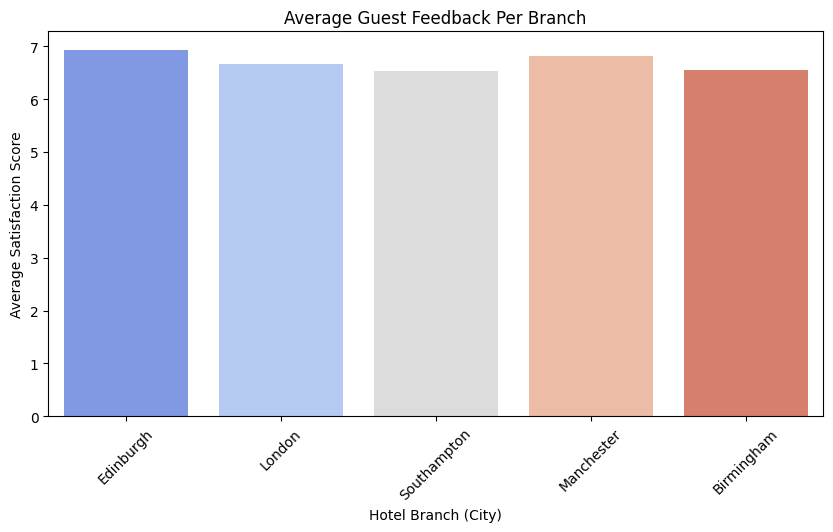

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path if needed)
file_path = "complete_hotel_dataset.xlsx"  # Update path if needed
xls = pd.ExcelFile(file_path)

# Load relevant sheets
review_df = pd.read_excel(xls, sheet_name="REVIEW")
booking_df = pd.read_excel(xls, sheet_name="BOOKING")
customer_df = pd.read_excel(xls, sheet_name="CUSTOMER")
room_df = pd.read_excel(xls, sheet_name="ROOM")
hotel_df = pd.read_excel(xls, sheet_name="HOTEL")

# Mapping hotel branches to city names
hotel_mapping = {
    1: "Edinburgh",
    2: "London",
    3: "Southampton",
    4: "Manchester",
    5: "Birmingham"
}

### 1️⃣ Average Guest Feedback Per Branch ###
# Merge review and booking tables to link satisfaction scores with hotel branches
review_booking_df = review_df.merge(booking_df, on="Booking_id", how="left")
review_booking_df = review_booking_df.merge(room_df, on="Room_id", how="left")
review_booking_df = review_booking_df.merge(hotel_df, on="Hotel_id", how="left")

# Compute average satisfaction score per hotel branch
branch_satisfaction = review_booking_df.groupby("Hotel_id")["Satisfaction_score"].mean().reset_index()

# Map Hotel IDs to City Names
branch_satisfaction["Hotel_id"] = branch_satisfaction["Hotel_id"].map(hotel_mapping)

# Plot Average Guest Feedback Per Branch
plt.figure(figsize=(10, 5))
sns.barplot(data=branch_satisfaction, x="Hotel_id", y="Satisfaction_score", palette="coolwarm")
plt.xlabel("Hotel Branch (City)")
plt.ylabel("Average Satisfaction Score")
plt.title("Average Guest Feedback Per Branch")
plt.xticks(rotation=45)
plt.show()




BOOKING columns: Index(['Booking_id', 'Room_id', 'Customer_id', 'Booking_date', 'Stay_purpose',
       'Num_of_adult', 'Check_in_date', 'Check_out_date', 'Check_in_time',
       'Check_out_time', 'Num_of_car', 'Booking_type'],
      dtype='object')
ROOM columns: Index(['Room_id', 'Hotel_id', 'Room_type', 'Room_rate'], dtype='object')
HOTEL columns: Index(['Hotel_id', 'Site_id', 'Floor'], dtype='object')


<ipython-input-66-d4a8ff8fb384>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_review_by_city, x="Location_city", y="Satisfaction_score", palette=palette_colors)


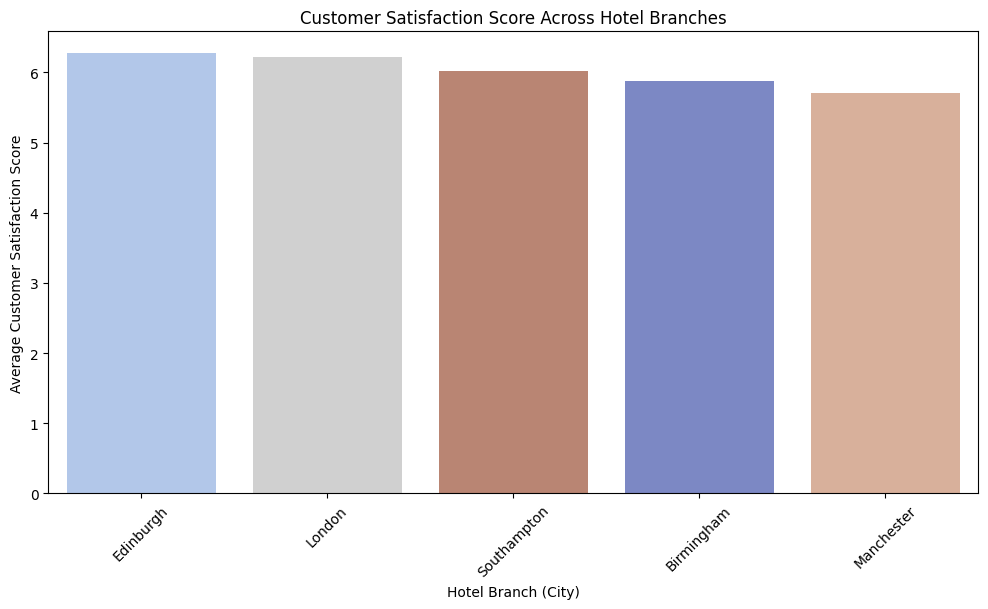

In [ ]:
# Load the dataset
file_path = "/content/complete_hotel_dataset (5).xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
review_df = pd.read_excel(xls, sheet_name="REVIEW")  # Guest satisfaction scores
booking_df = pd.read_excel(xls, sheet_name="BOOKING")  # Booking info (no Hotel_id)
room_df = pd.read_excel(xls, sheet_name="ROOM")  # Room details to get Hotel_id
hotel_df = pd.read_excel(xls, sheet_name="HOTEL")  # Hotel details
site_df = pd.read_excel(xls, sheet_name="SITE")  # Hotel location details

# Print column names for debugging
print("BOOKING columns:", booking_df.columns)
print("ROOM columns:", room_df.columns)
print("HOTEL columns:", hotel_df.columns)

# Merge review data with booking to get Room_id
review_merged_df = review_df.merge(booking_df, on="Booking_id", how="left")

# Merge with ROOM to get Hotel_id
review_merged_df = review_merged_df.merge(room_df, on="Room_id", how="left")

# Merge with HOTEL to get Site_id (Branch Information)
review_merged_df = review_merged_df.merge(hotel_df, on="Hotel_id", how="left")

# Merge with SITE to get Location (City Name)
review_merged_df = review_merged_df.merge(site_df, on="Site_id", how="left")

# Compute average guest satisfaction score per city (hotel branch)
avg_review_by_city = review_merged_df.groupby("Location_city")["Satisfaction_score"].mean().reset_index()

# Sort values in descending order for better visualization
avg_review_by_city = avg_review_by_city.sort_values(by="Satisfaction_score", ascending=False)

# Define city-specific colors
city_colors = {
    "Birmingham": "#7080D0",  # Blue shade
    "Edinburgh": "#A9C5F2",   # Light Blue shade
    "London": "#D0D0D0",      # Grey shade
    "Manchester": "#E2AD91",  # Light Brown shade
    "Southampton": "#C48068"  # Darker Brown shade
}

# Ensure sorted order aligns with city colors
palette_colors = [city_colors[city] if city in city_colors else "#888888" for city in avg_review_by_city["Location_city"]]

# Plot customer satisfaction score per branch
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_review_by_city, x="Location_city", y="Satisfaction_score", palette=palette_colors)
plt.xlabel("Hotel Branch (City)")
plt.ylabel("Average Customer Satisfaction Score")
plt.title("Customer Satisfaction Score Across Hotel Branches")
plt.xticks(rotation=45)
plt.show()

EMPLOYEE columns: Index(['Employee_id', 'Hotel_id', 'First_name', 'Surname', 'Gender', 'DOB'], dtype='object')


<ipython-input-67-39c35f3670ec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_department, x=department_column, y="Salary", palette="coolwarm")


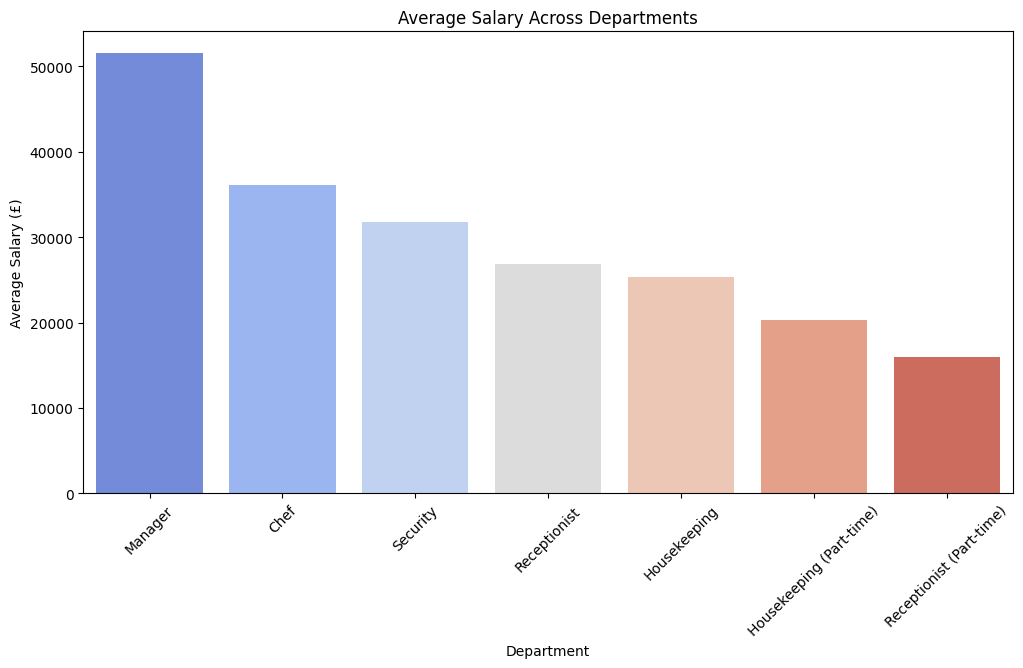

In [ ]:
# Load the dataset
file_path = "/content/complete_hotel_dataset (5).xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
contract_df = pd.read_excel(xls, sheet_name="CONTRACT")  # Contains salary and job type details
employee_df = pd.read_excel(xls, sheet_name="EMPLOYEE")  # Contains job type or department information

# Print column names for debugging
print("EMPLOYEE columns:", employee_df.columns)

# Find the correct column name for department
department_column = "Department" if "Department" in employee_df.columns else "Job_type"  # Adjust based on correct column name

# Merge contract data with employee data to get department details
salary_department_df = contract_df.merge(employee_df, on="Employee_id", how="left")

# Compute average salary per department
avg_salary_by_department = salary_department_df.groupby(department_column)["Salary"].mean().reset_index()

# Sort values in descending order for better visualization
avg_salary_by_department = avg_salary_by_department.sort_values(by="Salary", ascending=False)

# Plot average salary per department
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_salary_by_department, x=department_column, y="Salary", palette="coolwarm")
plt.xlabel("Department")
plt.ylabel("Average Salary (£)")
plt.title("Average Salary Across Departments")
plt.xticks(rotation=45)
plt.show()

<ipython-input-68-0cf806005d47>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=active_employee_count.sort_values("Total Employees", ascending=False),


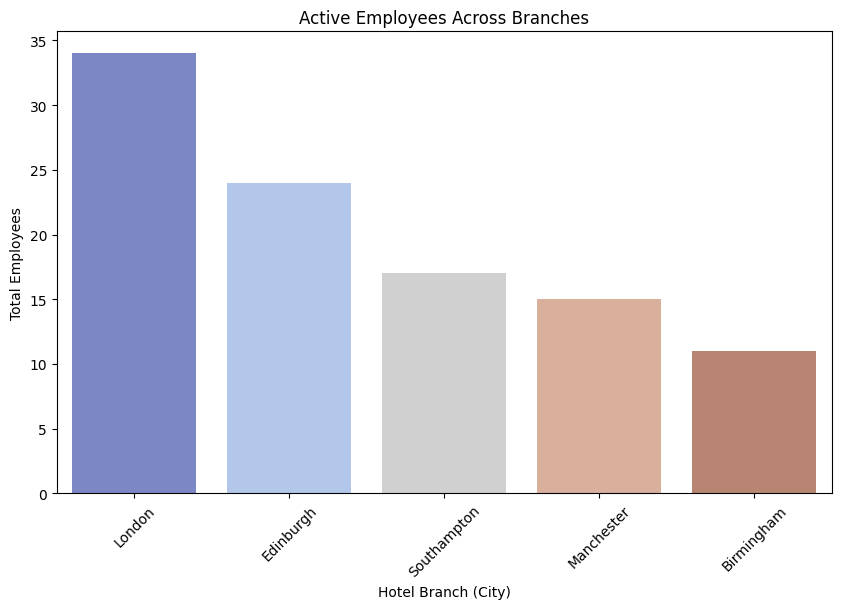

In [ ]:
# Load the dataset
file_path = "/content/complete_hotel_dataset (5).xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
contract_df = pd.read_excel(xls, sheet_name="CONTRACT")
employee_df = pd.read_excel(xls, sheet_name="EMPLOYEE")  # To get Hotel_id
hotel_df = pd.read_excel(xls, sheet_name="HOTEL")
site_df = pd.read_excel(xls, sheet_name="SITE")

# Convert hire and end dates to datetime format
contract_df["Hire_date"] = pd.to_datetime(contract_df["Hire_date"], errors="coerce")
contract_df["End_date"] = pd.to_datetime(contract_df["End_date"], errors="coerce")

# Merge contract data with employee data to get Hotel_id
contract_merged_df = contract_df.merge(employee_df, on="Employee_id", how="left")

# Merge with hotel and site details to get branch information
contract_merged_df = contract_merged_df.merge(hotel_df, on="Hotel_id", how="left")
contract_merged_df = contract_merged_df.merge(site_df, on="Site_id", how="left")

# Determine currently working employees (End_date is NaN)
active_employees = contract_merged_df[contract_merged_df["End_date"].isna()]

# Count active employees per branch
active_employee_count = active_employees.groupby("Location_city")["Employee_id"].count().reset_index()
active_employee_count.columns = ["City", "Total Employees"]

# Define city-specific colors
city_colors = {
    "London": "#D0D0D0",      # Grey shade
    "Edinburgh": "#A9C5F2",   # Light Blue shade
    "Southampton": "#C48068",  # Dark Brown shade
    "Manchester": "#E2AD91",  # Light Brown shade
    "Birmingham": "#7080D0"  # Blue shade
}

# Ensure sorted order aligns with city colors
palette_colors = [city_colors.get(city, "#808080") for city in active_employee_count["City"]]

# Plot active employees per branch in descending order
plt.figure(figsize=(10, 6))
sns.barplot(data=active_employee_count.sort_values("Total Employees", ascending=False),
            x="City", y="Total Employees", palette=palette_colors)
plt.xlabel("Hotel Branch (City)")
plt.ylabel("Total Employees")
plt.title("Active Employees Across Branches")
plt.xticks(rotation=45)
plt.show()

<ipython-input-69-911d20b6078b>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turnover_rate.sort_values("Turnover Rate", ascending=False),


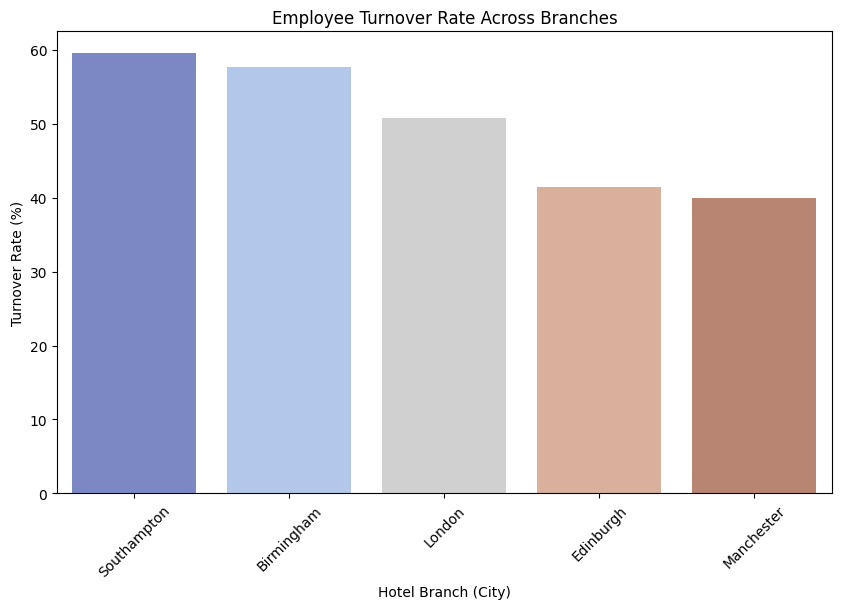

In [ ]:
# Load the dataset
file_path = "/content/complete_hotel_dataset (5).xlsx"
xls = pd.ExcelFile(file_path)

# Load relevant sheets
contract_df = pd.read_excel(xls, sheet_name="CONTRACT")
employee_df = pd.read_excel(xls, sheet_name="EMPLOYEE")  # To get Hotel_id
hotel_df = pd.read_excel(xls, sheet_name="HOTEL")
site_df = pd.read_excel(xls, sheet_name="SITE")

# Convert hire and end dates to datetime format
contract_df["Hire_date"] = pd.to_datetime(contract_df["Hire_date"], errors="coerce")
contract_df["End_date"] = pd.to_datetime(contract_df["End_date"], errors="coerce")

# Merge contract data with employee data to get Hotel_id
contract_merged_df = contract_df.merge(employee_df, on="Employee_id", how="left")

# Merge with hotel and site details to get branch information
contract_merged_df = contract_merged_df.merge(hotel_df, on="Hotel_id", how="left")
contract_merged_df = contract_merged_df.merge(site_df, on="Site_id", how="left")

# Determine employees who have left (End_date is NOT NaN)
left_employees = contract_merged_df[contract_merged_df["End_date"].notna()]

# Count total employees per branch and employees who left
total_employees_per_branch = contract_merged_df.groupby("Location_city")["Employee_id"].count()
left_employees_per_branch = left_employees.groupby("Location_city")["Employee_id"].count()

# Calculate turnover rate per branch
turnover_rate = (left_employees_per_branch / total_employees_per_branch) * 100
turnover_rate = turnover_rate.reset_index()
turnover_rate.columns = ["City", "Turnover Rate"]

# Define city-specific colors
city_colors = {
    "London": "#D0D0D0",      # Grey shade
    "Edinburgh": "#A9C5F2",   # Light Blue shade
    "Southampton": "#C48068",  # Dark Brown shade
    "Manchester": "#E2AD91",  # Light Brown shade
    "Birmingham": "#7080D0"  # Blue shade
}

# Ensure sorted order aligns with city colors
palette_colors = [city_colors.get(city, "#808080") for city in turnover_rate["City"]]

# Plot turnover rate per branch
plt.figure(figsize=(10, 6))
sns.barplot(data=turnover_rate.sort_values("Turnover Rate", ascending=False),
            x="City", y="Turnover Rate", palette=palette_colors)
plt.xlabel("Hotel Branch (City)")
plt.ylabel("Turnover Rate (%)")
plt.title("Employee Turnover Rate Across Branches")
plt.xticks(rotation=45)
plt.show()